In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import sys
from colorama import Fore, Back, Style
from collections import Counter
import json
import re
from pprint import pprint
import re
import numpy as np
import copy
import math
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import mixture
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# This json file is already in flat form by using BatFish on the original raw data

In [63]:
data = 'datasets/flat-sample/serverProperties.json'

In [3]:
props = []
datas = []

# Handling json file input to load as the json object
with open(data) as f:
    json_object = json.load(f)

# Extract the property names from the json object
props = []
for i, prop in enumerate(json_object[0]):
    if i > 0:
        props.append(prop)
        datas.append([])

# Extract data
for i in range(len(json_object)):
    for j, prop in enumerate(props):
        datas[j].append(json_object[i][prop])

In [4]:
json_object

[{'DNS_Servers': ['126.170.165.28', '126.175.61.217'],
  'Logging_Servers': ['126.170.38.121', '126.171.244.6', '126.172.24.96'],
  'NTP_Servers': ['126.170.165.28', '126.175.61.217'],
  'Node': {'id': 'nodeid-1', 'name': 'nodename-1'},
  'SNMP_Trap_Servers': ['126.170.164.99',
   '126.170.38.121',
   '126.172.24.96',
   '126.175.60.250'],
  'TACACS_Servers': ['126.170.160.247', '126.175.58.45']},
 {'DNS_Servers': [],
  'Logging_Servers': ['126.170.38.121', '126.171.244.6', '126.172.24.96'],
  'NTP_Servers': ['126.170.165.28', '126.175.61.217'],
  'Node': {'id': 'nodeid-2', 'name': 'nodename-2'},
  'SNMP_Trap_Servers': ['126.170.38.121', '126.171.244.6', '126.172.24.96'],
  'TACACS_Servers': ['126.170.160.247', '126.175.58.45']},
 {'DNS_Servers': [],
  'Logging_Servers': ['126.170.38.121', '126.171.244.6', '126.172.24.96'],
  'NTP_Servers': ['126.170.165.28', '126.175.61.217'],
  'Node': {'id': 'nodeid-3', 'name': 'nodename-3'},
  'SNMP_Trap_Servers': ['126.170.38.121', '126.171.244.6'

In [5]:
# The Features
props

['DNS_Servers',
 'TACACS_Servers',
 'SNMP_Trap_Servers',
 'NTP_Servers',
 'Logging_Servers']

In [6]:
datas

[[['126.170.165.28', '126.175.61.217'],
  [],
  [],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  [],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  [],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  [],
  ['126.170.165.28', '126.175.61.217'],
  [],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['126.170.165.28', '126.175.61.217'],
  ['

# Using Scikit Learn's MultiLabelBinarizer to convert the categorical data

In [7]:
mlb = MultiLabelBinarizer()

In [8]:
encodedLists = []
frequencyLists = []
uniqueClasses = []
proportion = 0 

In [9]:
for i, data in enumerate(datas):
    # fit_transform calculates the size of each category automatically based on the input data
    # and then encodes it into the multilabel bit encoding
    encodedList = mlb.fit_transform(datas[i])
    encodedLists.append(encodedList)
    uniqueClasses.append(mlb.classes_)
    frequencyList = [0] * len(encodedList[0])
    proportion += len(encodedList[0]) * len(encodedList)

    for e in encodedList:
        for i in range(len(e)):
            frequencyList[i] += e[i] 
            
    frequencyLists.append(frequencyList)

In [10]:
# After applying the encoder on original data
encodedLists

[array([[1, 1],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        

In [11]:
# For every feature in our data
frequencyLists

[[75, 75],
 [93, 93],
 [79, 96, 84, 2, 96, 79, 1],
 [95, 95],
 [74, 92, 79, 90, 74, 2]]

In [12]:
uniqueClasses

[array(['126.170.165.28', '126.175.61.217'], dtype=object),
 array(['126.170.160.247', '126.175.58.45'], dtype=object),
 array(['126.170.164.99', '126.170.38.121', '126.171.244.6',
        '126.171.246.17', '126.172.24.96', '126.175.60.250',
        '126.197.249.92'], dtype=object),
 array(['126.170.165.28', '126.175.61.217'], dtype=object),
 array(['126.170.164.99', '126.170.38.121', '126.171.244.6',
        '126.172.24.96', '126.175.60.250', 'udp/514'], dtype=object)]

In [13]:
# All the unique classes in our data set
mlb.classes_

array(['126.170.164.99', '126.170.38.121', '126.171.244.6',
       '126.172.24.96', '126.175.60.250', 'udp/514'], dtype=object)

In [14]:
densityLists = []
normalizedDensityLists = []
aggregatedDensityList = [0] * len(encodedLists[0])

In [15]:
for i in range(len(encodedLists)):
    densityList = [0] * len(encodedLists[i])
    normalizedDensityList = [0] * len(encodedLists[i])

    for j in range(len(densityList)):
        for k in range(len(encodedLists[i][j])): 
            densityList[j] += encodedLists[i][j][k] * frequencyLists[i][k]
            normalizedDensityList[j] += encodedLists[i][j][k] * frequencyLists[i][k] / float(proportion)
            aggregatedDensityList[j] += encodedLists[i][j][k] * frequencyLists[i][k]
    densityLists.append(densityList)
    normalizedDensityLists.append(normalizedDensityList)

In [16]:
densityLists

[[150,
  0,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  150,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  0,
  150,
  150,
  150,
  150,
  150,
  150,
  0,
  150,
  150,
  0,
  150,
  0,
  150,
  150,
  150,
  0,
  150,
  0,
  0,
  150,
  0],
 [186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  0,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  186,
  

In [17]:
normalizedDensityLists

[[0.08138903960933261,
  0.0,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.08138903960933261,
  0.0,
  0.0,
  0.081389

In [18]:
aggregatedDensityList

[1137,
 913,
 913,
 1369,
 1137,
 1369,
 1369,
 1137,
 1369,
 1369,
 1369,
 1369,
 1219,
 1104,
 1369,
 1369,
 1369,
 908,
 1369,
 1290,
 1369,
 1369,
 1369,
 1369,
 380,
 1369,
 750,
 1369,
 1369,
 1369,
 1369,
 1369,
 1369,
 1369,
 908,
 1369,
 1369,
 1369,
 1369,
 913,
 1370,
 1290,
 1290,
 866,
 1369,
 1369,
 1369,
 1369,
 1140,
 913,
 1369,
 1369,
 1137,
 1369,
 1369,
 866,
 1369,
 1369,
 913,
 1369,
 1369,
 1371,
 1369,
 902,
 1369,
 1369,
 902,
 1369,
 1369,
 832,
 1369,
 1025,
 1369,
 1371,
 913,
 913,
 1290,
 1369,
 1369,
 1369,
 1369,
 1369,
 913,
 1183,
 1369,
 913,
 1369,
 1140,
 1369,
 1369,
 1025,
 380,
 1369,
 913,
 908,
 1369,
 913]

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Below is the same data but in the form of DataFrames.
## I made dataframes for reference so that we can easily visualize and understand our data. 
## Not being used in our code in this format.
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [19]:
temp_data = [[datas[j][i] for j in range(len(datas))] for i in range(len(datas[0]))]

In [20]:
df_data = pd.DataFrame(temp_data, columns=props)

# Actual Data in json file

In [21]:
df_data

,DNS_Servers,TACACS_Servers,SNMP_Trap_Servers,NTP_Servers,Logging_Servers
0,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.172.24.96...","[126.170.165.28, 126.175.61.217]","[126.170.38.121, 126.171.244.6, 126.172.24.96]"
1,[],"[126.170.160.247, 126.175.58.45]","[126.170.38.121, 126.171.244.6, 126.172.24.96]","[126.170.165.28, 126.175.61.217]","[126.170.38.121, 126.171.244.6, 126.172.24.96]"
2,[],"[126.170.160.247, 126.175.58.45]","[126.170.38.121, 126.171.244.6, 126.172.24.96]","[126.170.165.28, 126.175.61.217]","[126.170.38.121, 126.171.244.6, 126.172.24.96]"
3,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.171.244.6...","[126.170.165.28, 126.175.61.217]","[126.170.164.99, 126.170.38.121, 126.171.244.6..."
4,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.172.24.96...","[126.170.165.28, 126.175.61.217]","[126.170.38.121, 126.171.244.6, 126.172.24.96]"
5,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.171.244.6...","[126.170.165.28, 126.175.61.217]","[126.170.164.99, 126.170.38.121, 126.171.244.6..."
6,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.171.244.6...","[126.170.165.28, 126.175.61.217]","[126.170.164.99, 126.170.38.121, 126.171.244.6..."
7,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.172.24.96...","[126.170.165.28, 126.175.61.217]","[126.170.38.121, 126.171.244.6, 126.172.24.96]"
8,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.171.244.6...","[126.170.165.28, 126.175.61.217]","[126.170.164.99, 126.170.38.121, 126.171.244.6..."
9,"[126.170.165.28, 126.175.61.217]","[126.170.160.247, 126.175.58.45]","[126.170.164.99, 126.170.38.121, 126.171.244.6...","[126.170.165.28, 126.175.61.217]","[126.170.164.99, 126.170.38.121, 126.171.244.6..."


In [22]:
temp_encodedList = [[encodedLists[j][i] for j in range(len(encodedLists))] for i in range(len(encodedLists[0]))]

In [23]:
df_encodedList = pd.DataFrame(temp_encodedList, columns=props)

# Data after applying the MultiLabelBinarizer on the above categorical dataset.
## Presence of 1 indicates that a particular value is present for the device. If 1 is not present then we conclude that the value is absent for the device.

In [24]:
df_encodedList

,DNS_Servers,TACACS_Servers,SNMP_Trap_Servers,NTP_Servers,Logging_Servers
0,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
1,"[0, 0]","[1, 1]","[0, 1, 1, 0, 1, 0, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
2,"[0, 0]","[1, 1]","[0, 1, 1, 0, 1, 0, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
3,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
4,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
5,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
6,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
7,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
8,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
9,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"


In [25]:
temp_densityList = [[densityLists[j][i] for j in range(len(densityLists))] for i in range(len(densityLists[0]))]

In [26]:
df_densityList = pd.DataFrame(temp_densityList, columns=props)

# Data in the form of DensityList
## Density list  is calculated by adding all the values if a particular categorical variable appears. If 1 is present we add this value or ignore the value if 0 is present.

In [27]:
df_densityList

,DNS_Servers,TACACS_Servers,SNMP_Trap_Servers,NTP_Servers,Logging_Servers
0,150,186,350,190,261
1,0,186,276,190,261
2,0,186,276,190,261
3,150,186,434,190,409
4,150,186,350,190,261
5,150,186,434,190,409
6,150,186,434,190,409
7,150,186,350,190,261
8,150,186,434,190,409
9,150,186,434,190,409


# AggregatedDensityList
## aggregatedDensityList is calculated by taking sum of a row in DensityList

In [28]:
aggregatedDensityList

[1137,
 913,
 913,
 1369,
 1137,
 1369,
 1369,
 1137,
 1369,
 1369,
 1369,
 1369,
 1219,
 1104,
 1369,
 1369,
 1369,
 908,
 1369,
 1290,
 1369,
 1369,
 1369,
 1369,
 380,
 1369,
 750,
 1369,
 1369,
 1369,
 1369,
 1369,
 1369,
 1369,
 908,
 1369,
 1369,
 1369,
 1369,
 913,
 1370,
 1290,
 1290,
 866,
 1369,
 1369,
 1369,
 1369,
 1140,
 913,
 1369,
 1369,
 1137,
 1369,
 1369,
 866,
 1369,
 1369,
 913,
 1369,
 1369,
 1371,
 1369,
 902,
 1369,
 1369,
 902,
 1369,
 1369,
 832,
 1369,
 1025,
 1369,
 1371,
 913,
 913,
 1290,
 1369,
 1369,
 1369,
 1369,
 1369,
 913,
 1183,
 1369,
 913,
 1369,
 1140,
 1369,
 1369,
 1025,
 380,
 1369,
 913,
 908,
 1369,
 913]

# Concatenated Features

In [29]:
concatenated_features = []
for i in range(len(encodedLists[0])):
    temp = []
    for j in range(len(encodedLists)):
        temp.extend(encodedLists[j][i])    
    concatenated_features.append(temp)

In [30]:
df_concatenatedFeatures = pd.DataFrame(concatenated_features)

# We get ConcatenatedFeatures by simply combining all the valuee in encodedList row wise.
## Below is a visual of how concatenatedFeatures is calculated from encodedList

In [31]:
df_encodedList

,DNS_Servers,TACACS_Servers,SNMP_Trap_Servers,NTP_Servers,Logging_Servers
0,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
1,"[0, 0]","[1, 1]","[0, 1, 1, 0, 1, 0, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
2,"[0, 0]","[1, 1]","[0, 1, 1, 0, 1, 0, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
3,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
4,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
5,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
6,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
7,"[1, 1]","[1, 1]","[1, 1, 0, 0, 1, 1, 0]","[1, 1]","[0, 1, 1, 1, 0, 0]"
8,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"
9,"[1, 1]","[1, 1]","[1, 1, 1, 0, 1, 1, 0]","[1, 1]","[1, 1, 1, 1, 1, 0]"


In [32]:
df_concatenatedFeatures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,0
1,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1,1,0,0
3,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,0
5,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0
7,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,0
8,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0


# @@@@@@@@@@@@@@@
# Implementation
# @@@@@@@@@@@@@@@


# Statistical Methods Implementation

## Tukey Method

In [33]:
def tukey(densityList):

    q1 = np.percentile(densityList, 25)
    q3 = np.percentile(densityList, 75)

    iqr = q3 - q1

    lower_distance = q1 - 1.5 * iqr
    upper_distance = q3 + 1.5 * iqr

    outliers = []

    for i, n in enumerate(densityList):
        if n < lower_distance or n > upper_distance:
            outliers.append(i)
    return outliers

## Z-Score

In [34]:
def z_score(densityList):
    mean = np.mean(densityList)
    std = np.std(densityList)

    outliers = []

    for i, n in enumerate(densityList):
        z = (n - mean) / std
        if abs(z) >= 1:
            outliers.append(i)
    return outliers

## Modified Z-Score

In [35]:
def modified_z_score(densityList):
    median = np.median(densityList)
    df = pd.DataFrame()
    df['a'] = densityList
    mad = df['a'].mad()

    outliers = []

    for i, n in enumerate(densityList):
        z = (n - median) / mad
        if abs(z) >= 1:
            outliers.append(i)

    return outliers

## Regression

In [36]:
def regression(points):
    # pointers should be a list of pairs of numbers (tuples)
    n = len(points)
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    sum_x2 = 0.0
    sum_y2 = 0.0

    for i in range(n):
        x = points[i][0]
        y = points[i][1]

        sum_x += x
        sum_y += y
        sum_xy += x * y
        sum_x2 += x * x
        sum_y2 += y * y

    a = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x * sum_x)
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
    return a, b

In [37]:
def predict(x, a, b):
    y = a + b * x
    return y

## Calculating MSE

In [38]:
def mean_squared_error(points, a, b):

    mse = 0
    for i in range(len(points)):
        prediction = predict(points[i][0], a, b)
        error = prediction - points[i][1]
        mse += error * error

    mse /= len(points)
    return mse

## Cook's Distance

In [39]:
def cooks_distance(points):
    # points should be a list of pairs of numbers (tuples)

    a, b = regression(points)

    outliers = []

    s = mean_squared_error(points, a, b)

    for i in range(len(points)):
        points_missing = copy.deepcopy(points)
        del points_missing[i]

        a_missing, b_missing = regression(points_missing)

        distance = 0

        # print(predict(points[i][0], a, b) - predict(points[i][0], a_missing, b_missing))

        for j in range(len(points)):
            distance += math.pow((predict(points[i][0], a, b) - predict(points[i][0], a_missing, b_missing)), 2)

        distance /= (3 * s)

        # print(distance)

        if distance > 0.05:
            # outliers.append(points[i])
            outliers.append(i)

    return outliers

## Mahalanobis Distance

In [40]:
def mahalanobis_distance(densityLists):

    vectors = []
    for i in range(len(densityLists[0])):
        vector = []

        for j in range(len(densityLists)):
            vector.append(densityLists[j][i]) 
        vectors.append(vector) 

    # calculate average vector
    average_vector = [0] * len(densityLists)
    for vector in vectors:
        for i in range(len(vector)):
            average_vector[i] += vector[i]

    for i in range(len(average_vector)):
        average_vector[i] /= len(vectors)

    # calculate mahalanobis distance for each point
    outliers = []

    try:
        for i, vector in enumerate(vectors):
            combination = np.vstack((vector, average_vector))
            covariance_matrix = np.cov(combination)
            mahalanobis_dist = distance.mahalanobis(vector, average_vector, covariance_matrix)

            if mahalanobis_dist > 200:
                outliers.append(i)
    except:
        print('ERROR: matrices not aligned, no mahalanobis distance outliers')
        pass

    return outliers

# ML Based Techniques

## Inter-Cluster Method

In [41]:
#This is the intercluster distance criteria.
#In this criteria, the minimum distance between the centroids is used as the parameter.
#Optimal value for the weight has to be set.

def read_values_inter_cluster_criteria(main_list):
    debug_flag = 0
    l = []
    dimensions = len(main_list)
    for i in range(len(main_list[0])):
        temp = []
        for j in range(dimensions):
            temp.append(main_list[j][i])
        l.append(temp)
    if(debug_flag == 1):
        print("list of properties is")
        print(l)

    no_clusters = 2
    clf = KMeans(n_clusters = no_clusters)
    clf.fit(l)
    centroids = clf.cluster_centers_
    if(debug_flag == 1):
        print(" Centroids are")
        print(centroids)

    labels = clf.labels_

    if(debug_flag == 1):
        for i in range(len(l)):
            print("coordinate:", l[i], "label:", labels[i], "centroid:", centroids[labels[i]])

    weight = 0.1
    if(debug_flag == 1):
        print("weight is")
        print(weight)
    cluster_distances = []
    for i in range(len(centroids) ):
        j = i + 1
        while(j < len (centroids)):
            cluster_distances.append(distance.euclidean(centroids[i], centroids[j]))
            j = j + 1
    if(debug_flag == 1):
        print("distance between the various clusters is as follows:")
        print(cluster_distances)
        print("minimum inter-cluster distance is")
    min_intercluster_dist = min(cluster_distances)
    if(debug_flag == 1):
        print("minimum distance between the clsuters is")
        print(min_intercluster_dist)
    #weighing parameter
    w = weight
    outliers1 = []
    for i in range(len(l)):
        if(distance.euclidean(l[i], centroids[labels[i]]) > min_intercluster_dist*w ):
            if(debug_flag == 1):
                print("outlier detected at index:", i)
                print("encoded outlier is", l[i])
            outliers1.append(i)


    if(debug_flag == 1):
        print("outliers by inter cluster criteria are ")
        print(outliers1)

    return outliers1

## Intra-Cluster Method

In [42]:
#This is the intracluster distance criteria.
# In this criteria, the minimum distance between the centroid and the own cluster elements is used as the parameter
# Optimal value for the threshold has to be set.

def read_values_intra_cluster_criteria(main_list):
    l = []
    debug_flag = 0
    dimensions = len(main_list)
    for i in range(len(main_list[0])):
        temp = []
        for j in range(dimensions):
            temp.append(main_list[j][i])
        l.append(temp)

    no_clusters = 2
    clf = KMeans(n_clusters=no_clusters)
    clf.fit(l)
    centroids = clf.cluster_centers_
    if(debug_flag == 1):
        print(" Centroids are")
        print(centroids)
    labels = clf.labels_
    if(debug_flag == 1):
        for i in range(len(l)):
            print("coordinate:", l[i], "label:", labels[i], "centroid:", centroids[labels[i]])

    threshold = 0.1
    if(debug_flag == 1):
        print("threshold is")
        print(threshold)
    points_cluster_dist= []
    for i in range(no_clusters):
        points_cluster_dist.append([])
    for i in range(len(l)):
        points_cluster_dist[labels[i]].append( distance.euclidean(l[i], centroids[labels[i]]) )

    outliers2=[]
    for i in range(len(l)):
        mini = min(points_cluster_dist[labels[i]])
        center_dist = distance.euclidean(l[i], centroids[labels[i]])
        if(mini < threshold *center_dist ):
            if(debug_flag == 1):
                print("outlier detected at index:", i)
                print("encoded outlier is", l[i])
            outliers2.append(i)
    if(debug_flag == 1):
        print("outliers by intra-cluster criteria are")
        print(outliers2)
    return outliers2

## Gaussian Mixture Method

In [43]:
def Gaussian(encodedLists):
    #Gaussian Mixture is used for soft clustering. Insted of assigning points to specific classes it assigns probability.
    #The n_components parameter in the Gaussian is used to specify the number of Gaussians.
    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    # print("concateanted feature is")
    # print(concatenated_features)
    clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
    clf.fit(concatenated_features)
    clf.means_
    Z = -clf.score_samples(np.array(concatenated_features))
    return Z

## KNN Method

In [44]:
def KNN(encodedLists):
    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    # print("concateanted feature is")
    # print(concatenated_features)
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(concatenated_features)
    distances, indices = nbrs.kneighbors(concatenated_features)
    print("indices in KNN are")
    print(indices)
    print("distances in KNN are")
    print(distances)

# Random Forest Method

In [45]:
def RandomForests(densityList,encodedLists):
    #First apply an existing outlier detection technique as RandomForests works on supervised data.

    mean = np.mean(densityList)
    std = np.std(densityList)

    outliers = []
    labels = []
    print("In RandomForests method")
    # print("density list is", densityList)

    for i, n in enumerate(densityList):
        z = (n - mean) / std
        if abs(z) >= 1:
            outliers.append(i)
            labels.append(1)
        else:
            labels.append(0)
    # print("labels are", labels)

    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    # print("concateanted feature is")
    # print(concatenated_features)
    
    indices = np.arange(len(labels))
    X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(concatenated_features, labels, indices, test_size=0.33, random_state=42)
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

    clf.fit(X_train, y_train)
    print("RandomForests predictions are")
    pred = list(clf.predict(X_test))
    print(pred)
    print("Actual classification is")
    print(y_test)
    
    outliers = []
    for i in range(len(pred)):
        if pred[i] == 1:
            outliers.append(idx2[i])
    return outliers

## Isolation Forest Method

In [46]:
def isolationForests(densityList,encodedLists):
    #First apply an existing outlier detection technique as RandomForests works on supervised data.

    mean = np.mean(densityList)
    std = np.std(densityList)

    outliers = []
    labels = []
    print("In RandomForests method")
    # print("density list is", densityList)

    for i, n in enumerate(densityList):
        z = (n - mean) / std
        if abs(z) >= 1:
            outliers.append(i)
            labels.append(1)
        else:
            labels.append(0)
    print("labels are", labels)

    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    # print("concateanted feature is")
    # print(concatenated_features)
    
    indices = np.arange(len(labels))
    X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(concatenated_features, labels, indices, test_size=0.33, random_state=42)
    clf = IsolationForest(max_samples=100)
                      
    clf.fit(X_train)
    y_pred_train = list(clf.predict(X_train))
    y_pred_test = list(clf.predict(X_test))
    print("isolationForests predictions on train data are")
    print(y_pred_train)
    print("isolationForests predictions on test data are")
    print(y_pred_test)
    
    outliers = []
    for i in range(len(y_pred_test)):
        if y_pred_test[i] == 1:
            outliers.append(idx2[i])
    return outliers

## Naive Bayes Method

In [47]:
def NaiveBayes(densityList,encodedLists):
    #First apply an existing outlier detection technique as Naive Bayes works on supervised data.
    #So, first we are using z-score threshold to train the Naive Bayes Classifier.
    t1=time.time()
    mean = np.mean(densityList)
    std = np.std(densityList)

    outliers = []
    labels = []
    print("In Naive Bayes method")
    #print("density list is", densityList)

    for i, n in enumerate(densityList):
        z = (n - mean) / std
        if abs(z) >= 1:
            outliers.append(i)
            labels.append(1)
        else:
            labels.append(0)
    #print("labels are", labels)

    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    # print("concateanted feature is")
    # print(concatenated_features)

    indices = np.arange(len(labels))
    X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(concatenated_features, labels, indices, test_size=0.33, random_state=42)

    clf = GaussianNB()
    clf.fit(X_train, y_train)

    print("Naive Bayes predictions are")
    pred = list(clf.predict(X_test))
    print(pred)

    print("Actual classification is")
    print(y_test)

    print("Time taken by NaiveBayes is")
    print(time.time()-t1)
    
    outliers = []
    for i in range(len(pred)):
        if pred[i] == 1:
            outliers.append(idx2[i])
    return outliers

## Logistic Regression Method

In [48]:
def Logistic_Regression(densityList,encodedLists):
    t1 = time.time()
    mean = np.mean(densityList)
    std = np.std(densityList)

    outliers = []
    labels = []
    print("In Logistic Regression method")
    #print("density list is", densityList)

    for i, n in enumerate(densityList):
        z = (n - mean) / std
        if abs(z) >= 1:
            outliers.append(i)
            labels.append(1)
        else:
            labels.append(0)
    #print("labels are", labels)

    concatenated_features = []
    for i in range(len(encodedLists[0])):
        temp = []
        for j in range(len(encodedLists)):
            temp.extend(encodedLists[j][i])    
        concatenated_features.append(temp)   
    
    #print("concateanted feature is")
    #print(concatenated_features)
    
    indices = np.arange(len(labels))
    X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(concatenated_features, labels, indices, test_size=0.33, random_state=42)

    clf =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    clf.fit(X_train, y_train)

    print("Logistic Regression predictions are")
    pred = list(clf.predict(X_test))
    print(pred)

    print("Actual classification is")
    print(y_test)

    print("Time taken by Logistic Regression is")
    print(time.time()-t1)
    
    outliers = []
    for i in range(len(pred)):
        if pred[i] == 1:
            outliers.append(idx2[i])
    return outliers

# Calling Methods

## ML Based Methods

In [49]:
#Inter-Cluster
outliers = read_values_inter_cluster_criteria(densityLists)
label = 'Inter-cluster distance method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

Inter-cluster distance method outliers: 
[0, 1, 2, 4, 7, 12, 13, 17, 19, 24, 26, 34, 39, 41, 42, 43, 48, 49, 52, 55, 58, 63, 66, 69, 71, 74, 75, 76, 82, 83, 85, 87, 90, 91, 93, 94, 96]
Number of Outliers: 37

Outlier index: 0
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 1
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 2
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Serv

In [50]:
#Intra-Cluster
outliers = read_values_intra_cluster_criteria(densityLists)
label = 'Intra-cluster distance method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

Intra-cluster distance method outliers: 
[13, 48, 71, 83, 87, 90]
Number of Outliers: 6

Outlier index: 13
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: []
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.171.244.6', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.164.99', '126.170.38.121', '126.172.24.96', '126.175.60.250']

Outlier index: 48
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.171.244.6', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.164.99', '126.170.38.121', '126.172.24.96', '126.175.60.250']

Outlier index: 71
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: []
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: 

In [51]:
# Gaussian Mixture Model
likelihood = Gaussian(encodedLists)
print("Likelihood given by G.M.M is\n{}".format(likelihood))
print()

Likelihood given by G.M.M is
[ -47.53286169  -51.96782295  -51.96782295  -55.45159756  -47.53286169
  -55.45159756  -55.45159756  -47.53286169  -55.45159756  -55.45159756
  -55.45159756  -55.45159756  -40.10730423  -30.43881041  -55.45159756
  -55.45159756  -55.45159756  -45.98290309  -55.45159756  -47.2755157
  -55.45159756  -55.45159756  -55.45159756  -55.45159756 -103.10098372
  -55.45159756 -102.35098439  -55.45159756  -55.45159756  -55.45159756
  -55.45159756  -55.45159756  -55.45159756  -55.45159756  -45.98290309
  -55.45159756  -55.45159756  -55.45159756  -55.45159756  -51.96782295
   -9.24473076  -47.2755157   -47.2755157   -32.74196839  -55.45159756
  -55.45159756  -55.45159756  -55.45159756  -45.83360075  -51.96782295
  -55.45159756  -55.45159756  -47.53286169  -55.45159756  -55.45159756
  -32.74196839  -55.45159756  -55.45159756  -51.96782295  -55.45159756
  -55.45159756  -32.74141763  -55.45159756  -32.74252016  -55.45159756
  -55.45159756  -32.74252016  -55.45159756  -55.4

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


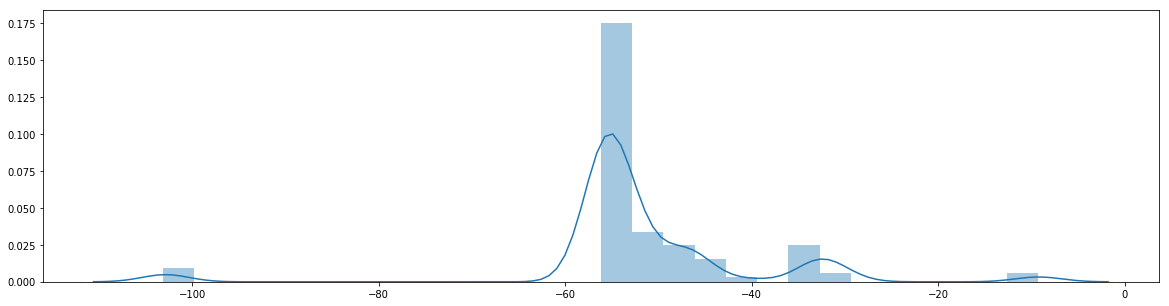

In [52]:
plt.figure(figsize=(20,5))
sns.distplot(likelihood)

In [53]:
# KNN
KNN(encodedLists)
print()

indices in KNN are
[[ 7  0]
 [ 1 96]
 [ 1 96]
 [23 22]
 [ 7  0]
 [23 22]
 [23 22]
 [ 7  0]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [12 48]
 [13 83]
 [23 22]
 [23 22]
 [23 22]
 [34 17]
 [23 22]
 [42 41]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [91 24]
 [23 22]
 [26 96]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [34 17]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [ 1 96]
 [40 22]
 [42 41]
 [42 41]
 [55 43]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [87 48]
 [ 1 96]
 [23 22]
 [23 22]
 [ 7  0]
 [23 22]
 [23 22]
 [55 43]
 [23 22]
 [23 22]
 [ 1 96]
 [23 22]
 [23 22]
 [73 61]
 [23 22]
 [66 63]
 [23 22]
 [23 22]
 [66 63]
 [23 22]
 [23 22]
 [69 43]
 [23 22]
 [90 71]
 [23 22]
 [73 61]
 [ 1 96]
 [ 1 96]
 [42 41]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [23 22]
 [ 1 96]
 [83 13]
 [23 22]
 [ 1 96]
 [23 22]
 [87 48]
 [23 22]
 [23 22]
 [90 71]
 [91 24]
 [23 22]
 [ 1 96]
 [34 17]
 [23 22]
 [ 1 96]]
distances in KNN are
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.       

In [54]:
#Naive Bayes
outliers = NaiveBayes(aggregatedDensityList,encodedLists)
print('\nOutliers are')
print(outliers)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

In Naive Bayes method
Naive Bayes predictions are
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Actual classification is
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Time taken by NaiveBayes is
0.0065212249755859375

Outliers are
[93, 75, 26, 49, 39]
Number of Outliers: 5

Outlier index: 93
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 75
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 26
	DNS_Servers: []
	TACACS_Serv

In [55]:
# Logistic Regression
outliers = Logistic_Regression(aggregatedDensityList,encodedLists)
print('\nOutliers are')
print(outliers)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

In Logistic Regression method
Logistic Regression predictions are
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Actual classification is
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Time taken by Logistic Regression is
0.023585081100463867

Outliers are
[93, 75, 26, 49, 39]
Number of Outliers: 5

Outlier index: 93
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 75
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 26
	DNS_

In [56]:
# Random Forest
outliers = RandomForests(aggregatedDensityList,encodedLists)
print('\nOutliers are')
print(outliers)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

In RandomForests method
RandomForests predictions are
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Actual classification is
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Outliers are
[93, 75, 26, 49, 39]
Number of Outliers: 5

Outlier index: 93
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 75
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 26
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNM

In [57]:
# Isolation Forest
outliers = isolationForests(aggregatedDensityList,encodedLists)
print('\nOutliers are')
print(outliers)
print('Number of Outliers: {}'.format(len(outliers)))
print()
for outlier in outliers:
    print('Outlier index: %d' % outlier)
    for i, data in enumerate(datas):
        print('\t%s: %s' % (props[i], data[outlier]))
    print()
print()

In RandomForests method
labels are [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]
isolationForests predictions on train data are

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:187: UserWarning: max_samples (100) is greater than the total number of samples (64). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



[1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1]
isolationForests predictions on test data are
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Outliers are
[62, 40, 93, 18, 81, 83, 64, 42, 10, 0, 31, 75, 47, 26, 44, 4, 22, 12, 89, 73, 49, 70, 68, 15, 39, 33, 9, 80, 11, 65, 95, 30, 28]
Number of Outliers: 33

Outlier index: 62
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.171.244.6', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.164.99', '126.170.38.121', '126.171.244.6', '126.172.24.96', '126.175.60.250']

Outlier index: 40
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: ['126.17

## Statistical Based Methods

In [58]:
# Tukey's method.
outliers = tukey(aggregatedDensityList)
label = 'Tukey\'s method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
for outlier in outliers:
    print("Outlier index: %d" % outlier)
    for i, data in enumerate(datas):
        print("\t%s: %s" % (props[i], data[outlier]))
    print()
print()

Tukey's method outliers: 
[24, 91]
Number of Outliers: 2
Outlier index: 24
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.172.24.96']
	NTP_Servers: []
	Logging_Servers: ['udp/514']

Outlier index: 91
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.172.24.96']
	NTP_Servers: []
	Logging_Servers: ['udp/514']




In [59]:
# Z-Score
outliers = z_score(aggregatedDensityList)
label = 'Z-Score method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
for outlier in outliers:
    print("Outlier index: %d" % outlier)
    for i, data in enumerate(datas):
        print("\t%s: %s" % (props[i], data[outlier]))
    print()
print()

Z-Score method outliers: 
[1, 2, 17, 24, 26, 34, 39, 43, 49, 55, 58, 63, 66, 69, 74, 75, 82, 85, 91, 93, 94, 96]
Number of Outliers: 22
Outlier index: 1
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 2
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 17
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.172.24.96']

Outlier i

In [60]:
# Modified Z-Score
outliers = modified_z_score(aggregatedDensityList)
label = 'Modified Z-Score method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
for outlier in outliers:
    print("Outlier index: %d" % outlier)
    for i, data in enumerate(datas):
        print("\t%s: %s" % (props[i], data[outlier]))
    print()
print()

Modified Z-Score method outliers: 
[0, 1, 2, 4, 7, 13, 17, 24, 26, 34, 39, 43, 48, 49, 52, 55, 58, 63, 66, 69, 71, 74, 75, 82, 85, 87, 90, 91, 93, 94, 96]
Number of Outliers: 31
Outlier index: 0
	DNS_Servers: ['126.170.165.28', '126.175.61.217']
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.164.99', '126.170.38.121', '126.172.24.96', '126.175.60.250']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 1
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 2
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.17

In [61]:
# Cook's Method
cooksDensityList = []
for i, value in enumerate(aggregatedDensityList):
    cooksDensityList.append((i, value))

outliers = cooks_distance(cooksDensityList)
label = 'Cook\'s distance method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
for outlier in outliers:
    print("Outlier index: %d" % outlier)
    for i, data in enumerate(datas):
        print("\t%s: %s" % (props[i], data[outlier]))
    print()
print()

Cook's distance method outliers: 
[1, 2, 24, 91, 93, 94, 96]
Number of Outliers: 7
Outlier index: 1
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 2
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']
	NTP_Servers: ['126.170.165.28', '126.175.61.217']
	Logging_Servers: ['126.170.38.121', '126.171.244.6', '126.172.24.96']

Outlier index: 24
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.172.24.96']
	NTP_Servers: []
	Logging_Servers: ['udp/514']

Outlier index: 91
	DNS_Servers: []
	TACACS_Servers: ['126.170.160.247', '126.175.58.45']
	SNMP_Trap_Servers: ['126.170.38.121', '126.172.24.96']
	NTP_Server

In [62]:
# Mahalanobis Method
outliers = mahalanobis_distance(densityLists)
label = 'Malanobis distance method outliers: \n' + str(outliers)
print(label)
print('Number of Outliers: {}'.format(len(outliers)))
for outlier in outliers:
    print("Outlier index: %d" % outlier)
    for i, data in enumerate(datas):
        print("\t%s: %s" % (props[i], data[outlier]))
    print()
print()

ERROR: matrices not aligned, no mahalanobis distance outliers
Malanobis distance method outliers: 
[]
Number of Outliers: 0

